In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [3]:
cd/gdrive/MyDrive/Animal classification/

/gdrive/MyDrive/Animal classification


In [7]:
ls

cats/  dogs/  horses/


In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import load_img

In [5]:
import os
import PIL
import pathlib
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS=40
CHANNELS=3

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/gdrive/MyDrive/Animal classification/",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 606 files belonging to 3 classes.


In [9]:
class_names = dataset.class_names
class_names

['cats', 'dogs', 'horses']

In [10]:
len(dataset)

10

In [11]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(image_batch[1])
  print(label_batch.numpy())

(62, 256, 256, 3)
tf.Tensor(
[[[ 17.091797  13.091797  28.091797]
  [ 33.476562  30.214844  44.845703]
  [ 39.691406  37.691406  51.691406]
  ...
  [188.69336  161.07812  140.23242 ]
  [190.47656  166.63086  146.36914 ]
  [186.36914  163.49219  146.87695 ]]

 [[ 51.65497   47.65497   62.65497 ]
  [ 56.120422  52.858704  67.48956 ]
  [ 45.33954   43.33954   57.33954 ]
  ...
  [189.45978  161.84454  140.99884 ]
  [188.9986   165.1529   144.89117 ]
  [185.35138  162.47443  144.26971 ]]

 [[ 73.170044  69.170044  84.170044]
  [ 65.42218   61.537537  76.168396]
  [ 36.514038  32.826538  46.826538]
  ...
  [195.31512  167.69989  146.85419 ]
  [193.06445  169.21875  148.95703 ]
  [190.20477  167.32782  148.95868 ]]

 ...

 [[135.9151   146.07135  148.07135 ]
  [145.86835  155.344    157.65546 ]
  [142.30444  150.42468  153.36456 ]
  ...
  [ 39.55902   37.71527   23.934021]
  [ 37.1474    36.900513  21.5224  ]
  [ 46.068054  46.755554  30.443054]]

 [[128.05878  139.05878  141.05878 ]
  [141.0

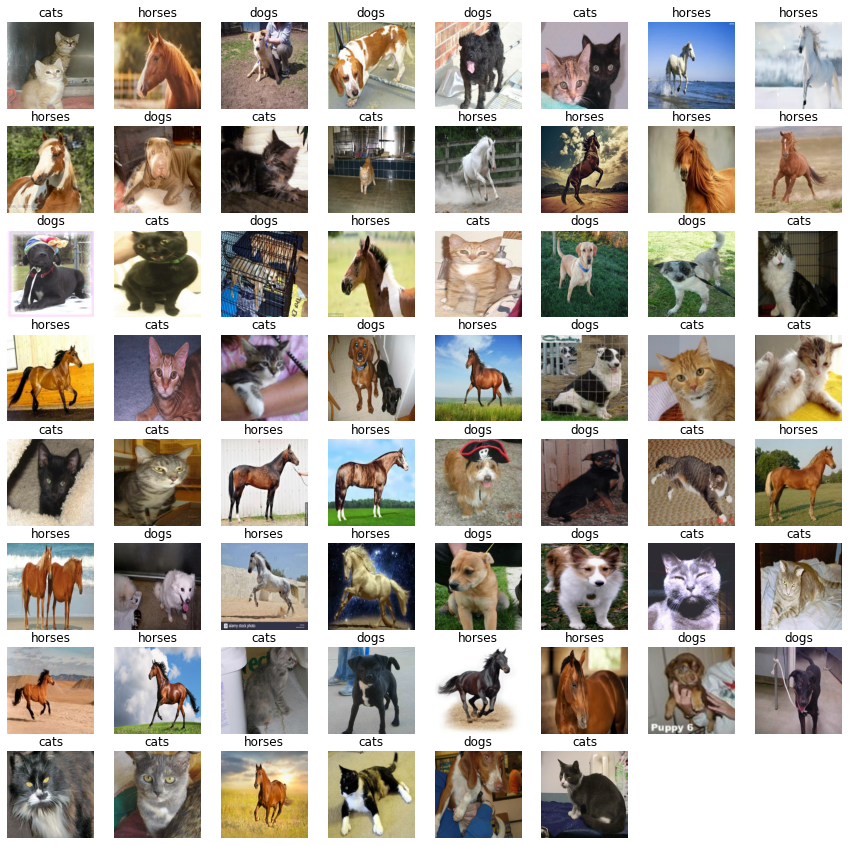

In [12]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [13]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    # Autotune all the 3 datasets 
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    return train_ds, val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [15]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [16]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [17]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 9

model = models.Sequential([
    resize_and_rescale,
    # data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (62, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (62, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (62, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (62, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (62, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (62, 60, 60, 64)         

In [20]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/40
8/8 [==============================] - 62s 7s/step - loss: 1.7352 - accuracy: 0.3367 - val_loss: 1.2888 - val_accuracy: 0.2903
Epoch 2/40
8/8 [==============================] - 51s 6s/step - loss: 1.1750 - accuracy: 0.3367 - val_loss: 1.1647 - val_accuracy: 0.2419
Epoch 3/40
8/8 [==============================] - 51s 6s/step - loss: 1.1088 - accuracy: 0.3528 - val_loss: 1.1220 - val_accuracy: 0.2581
Epoch 4/40
8/8 [==============================] - 51s 6s/step - loss: 1.0842 - accuracy: 0.3992 - val_loss: 1.0854 - val_accuracy: 0.3710
Epoch 5/40
8/8 [==============================] - 51s 6s/step - loss: 1.0647 - accuracy: 0.4234 - val_loss: 1.0648 - val_accuracy: 0.4355
Epoch 6/40
8/8 [==============================] - 51s 6s/step - loss: 1.0392 - accuracy: 0.4496 - val_loss: 1.0502 - val_accuracy: 0.4355
Epoch 7/40
8/8 [==============================] - 51s 6s/step - loss: 1.0050 - accuracy: 0.4879 - val_loss: 0.9797 - val_accuracy: 0.4839
Epoch 8/40
8/8 [==================

In [21]:
model.evaluate(test_ds)

1/1 [==============================] - 3s 3s/step - loss: 0.2762 - accuracy: 0.9516


[0.27621686458587646, 0.9516128897666931]

In [22]:
acc = history.history['accuracy']
loss = history.history['loss']

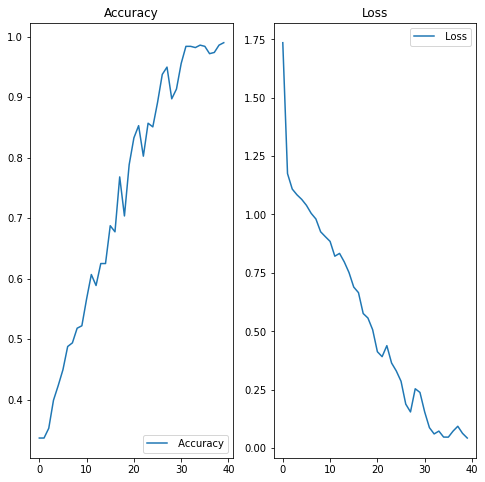

In [23]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label=' Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label=' Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

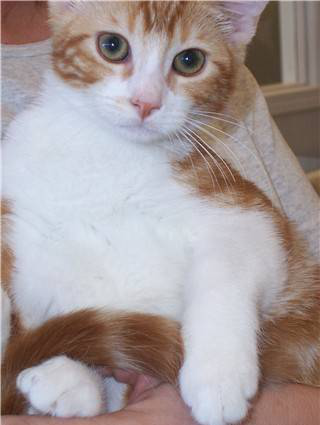

In [24]:
image_path = "/gdrive/My Drive/cat.9.jpg"
image = preprocessing.image.load_img(image_path)
image_array = preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
image

In [25]:
pred = model.predict(scaled_img)

In [26]:
output = class_names[np.argmax(pred)]

In [27]:
output

'cats'

In [28]:
model.save("animal classification.h5")